In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from derivative import dxdt

In [11]:
import sys
sys.path.append('../PyDynamics/sindy_files/')
import sindy

In [13]:
import sys
sys.path.append('../PyDynamics/dmd_files/')
import edmd

In [14]:
import lorenz_sindy_utils as lsindy
import lorenz_utils_edmd as ledmd

In [15]:
SIGMA = 10
RHO = 28
BETA = 8/3

In [16]:
T0 = 0.001
DT = 0.001
T = 80
P_order = 2
threshold = 0.025

In [18]:
lorenz_params =[SIGMA,RHO,BETA]

In [19]:
u0 = np.array([0,8,27])

In [20]:
Eta = 0.005

In [21]:
sim_time,sim_data,Coeff,err = lsindy.lorenz_system_gen(u0,T0,T,DT,P_order,threshold,lorenz_params)
sindy_sim_time,sindy_model_data=lsindy.sindy_lorenz_trajectory(u0,Coeff,P_order,T0,T,DT)

[[  0.           0.           0.        ]
 [-10.00444457  27.7997138    0.        ]
 [ 10.00425126  -0.95539243   0.        ]
 [  0.           0.          -2.66685381]
 [  0.           0.           0.        ]
 [  0.           0.           0.99916241]
 [  0.          -0.99343129   0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]]
(10, 3)


In [23]:
tn,Un,UPn = ledmd.generate_noisy_data(Eta,u0,T0,T,DT,lorenz_params)
ThetaRn, ThetaRdn = ledmd.trial_function_eval(np.transpose(Un), np.transpose(UPn))
An=edmd.findA(ThetaRn, ThetaRdn)

In [26]:
edmd_time, edmd_data = ledmd.edmd_lorenz_trajectory(u0,An[0:3],T0,T,DT)

[[-9.96181291  9.97377533  0.          0.          0.          0.
   0.          0.          0.        ]
 [27.65112248 -0.84707329  0.          0.          0.          0.
   0.         -0.98901179  0.        ]
 [ 0.          0.         -2.65153233  0.          0.          0.
   0.99415628  0.          0.        ]]
(3, 9)


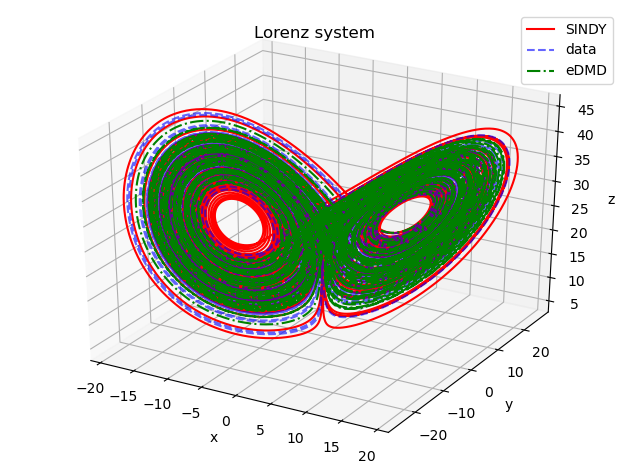

In [27]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(sindy_model_data[:,0],sindy_model_data[:,1],sindy_model_data[:,2],color="red",label="SINDY")
ax.plot3D(sim_data.T[0],sim_data.T[1],sim_data.T[2],"--",color="blue",alpha=0.6,label="data")
ax.plot3D(edmd_data.T[0],edmd_data.T[1],edmd_data.T[2],"-.",color="green",label="eDMD")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Lorenz system")
ax.legend()
plt.tight_layout()
plt.savefig("Figures/Lorenz_Data_vs_SINDY_v_edmd_3d.pdf")

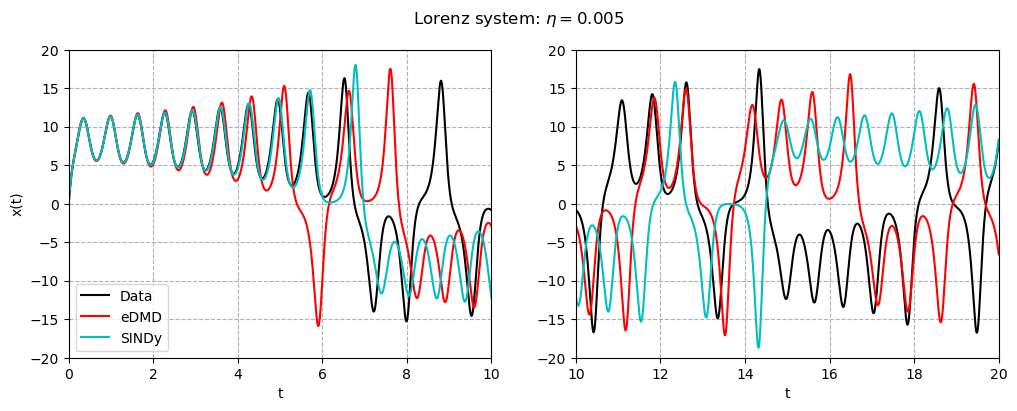

In [69]:
fig,ax = plt.subplots(1,2,figsize=[12,4])
ax[0].plot(sim_time,sim_data.T[0],"k-",label="Data")
ax[0].plot(edmd_time,edmd_data.T[0],"r-",label="eDMD")
ax[0].plot(sindy_sim_time,sindy_model_data.T[0],"c-",label="SINDy")
ax[0].set_xlim(0,10)

ax[1].plot(sim_time,sim_data.T[0],"k-",label="Data")
ax[1].plot(edmd_time,edmd_data.T[0],"r-",label="eDMD")
ax[1].plot(sindy_sim_time,sindy_model_data.T[0],"c-",label="SINDy")
ax[1].set_xlim(10,20)

ax[0].legend()
ax[0].set_xlabel("t")
ax[1].set_xlabel("t")
ax[0].set_ylabel("x(t)")
ax[1].grid(True, linestyle='--')
ax[0].grid(True, linestyle='--')
ax[0].set_ylim(-20,20)
ax[1].set_ylim(-20,20)
fig.suptitle("Lorenz system: $\eta = %2.3f$"%(Eta))
plt.savefig("Figures/Lorenz_noise_time_series.pdf")


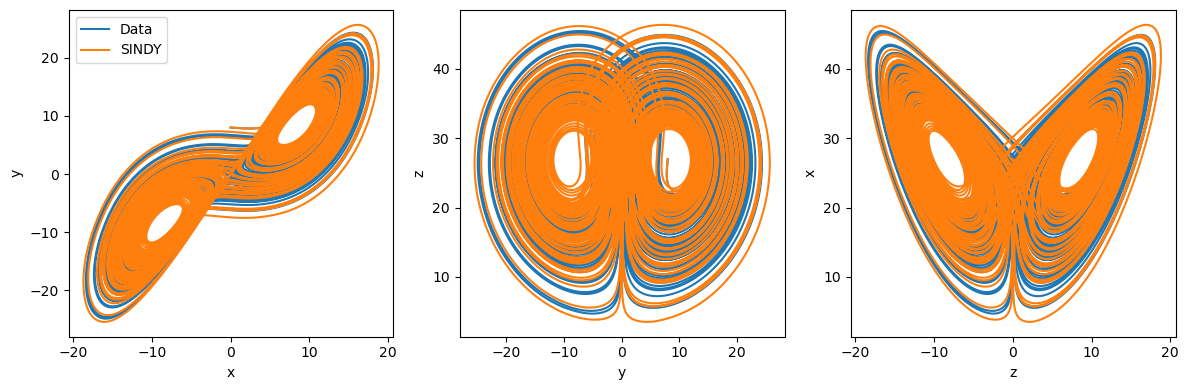

In [21]:
fig,ax = plt.subplots(1,3,figsize=[12,4])
ax[0].plot(sim_data[:,0],sim_data[:,1],label="Data")
ax[0].plot(sindy_model_data[:,0],sindy_model_data[:,1],label="SINDY")
ax[0].legend()
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[1].plot(sim_data[:,1],sim_data[:,2])
ax[1].plot(sindy_model_data[:,1],sindy_model_data[:,2])
ax[1].set_xlabel("y")
ax[1].set_ylabel("z")
ax[2].plot(sim_data[:,0],sim_data[:,2])
ax[2].plot(sindy_model_data[:,0],sindy_model_data[:,2])
ax[2].set_xlabel("z")
ax[2].set_ylabel("x")
fig.tight_layout()
plt.savefig("Figures/lorenz-cross-section-SINDY.pdf")

No handles with labels found to put in legend.


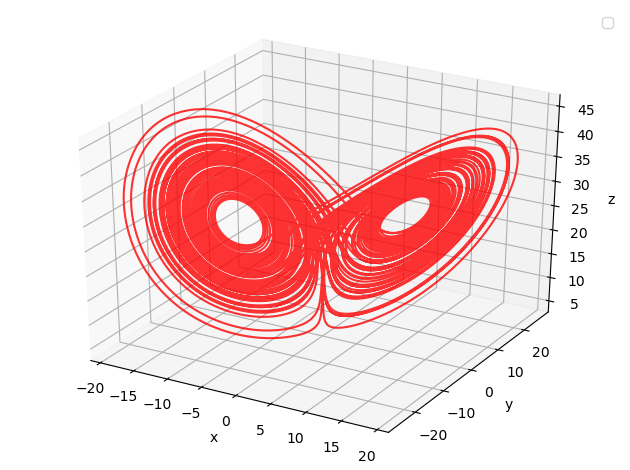

In [80]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(sindy_model_data[:,0],sindy_model_data[:,1],sindy_model_data[:,2],color="red",alpha=0.8)
#ax.plot3D(sim_data.T[0],sim_data.T[1],sim_data.T[2],"--",color="blue",alpha=0.6,label="data")
#ax.plot3D(edmd_data.T[0],edmd_data.T[1],edmd_data.T[2],"-.",color="green",label="eDMD")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
#ax.set_title("Lorenz system")
ax.legend()
plt.tight_layout()
plt.savefig("Figures/Lorenz3d_sindy.pdf")

No handles with labels found to put in legend.


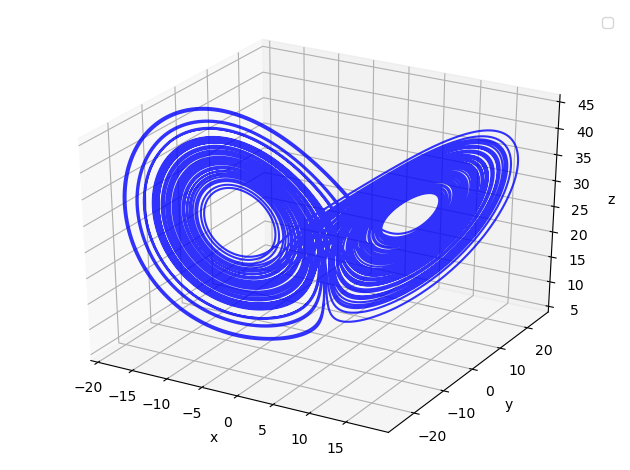

In [79]:
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.plot3D(sindy_model_data[:,0],sindy_model_data[:,1],sindy_model_data[:,2],color="red",alpha=0.8)
ax.plot3D(sim_data.T[0],sim_data.T[1],sim_data.T[2],color="blue",alpha=0.8)
#ax.plot3D(edmd_data.T[0],edmd_data.T[1],edmd_data.T[2],"-.",color="green",label="eDMD")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
#ax.set_title("Lorenz system")
ax.legend()
plt.tight_layout()
plt.savefig("Figures/Lorenz3d.pdf")

## Error vs time sampled and thresholding

In [33]:
t0 = 0
dt = 0.001
porder = 2
lamda = 0.25
iterations = 100
error_v_tmax = []
tmax_list = np.linspace(5,100,10)

for tend in tmax_list:
    sim_time,sim_data,Coeff,err = lorenz.lorenz_system_gen(u0,t0,tend,dt,porder,lamda,lorenz_params)
    error_v_tmax.append(err)

In [39]:
t0 = 0
tend = 80
dt = 0.001
porder = 2
lamda_list = [0.001,0.01,0.05,0.1,0.25,0.5,0.8,0.9,1.5]
iterations = 100
error_v_lamda = []


for lamda in lamda_list:
    sim_time,sim_data,Coeff,err = lorenz.lorenz_system_gen(u0,t0,tend,dt,porder,lamda,lorenz_params)
    error_v_lamda.append(err)

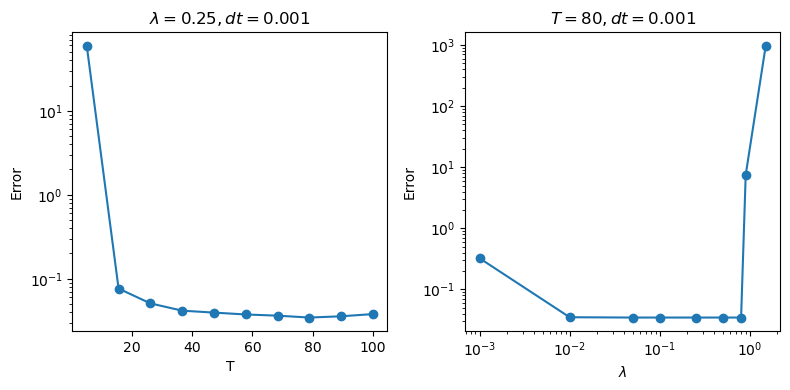

In [42]:
fig,ax = plt.subplots(1,2,figsize=[8,4])
ax[0].plot(tmax_list,error_v_tmax)
ax[0].scatter(tmax_list,error_v_tmax)
ax[0].set_yscale("log")
ax[0].set_ylabel("Error")
ax[0].set_xlabel("T")
ax[0].set_title(r"$\lambda = 0.25, dt = 0.001$")


ax[1].plot(lamda_list,error_v_lamda)
ax[1].scatter(lamda_list,error_v_lamda)
ax[1].set_yscale("log")
ax[1].set_xscale("log")
ax[1].set_ylabel("Error")
ax[1].set_xlabel("$\lambda$")
ax[1].set_title(r"$T = 80, dt = 0.001$")

fig.tight_layout()

## Adding Gaussian noise to Lorenz data

In [40]:
Eta = 0.00250

In [41]:
sim_time,sim_data,Coeff,err = lorenz.lorenz_system_with_noise_gen(Eta,u0,T0,T,DT,P_order,threshold,lorenz_params)

In [43]:
Coeff

array([[  0.        ,   0.        ,   0.        ],
       [-10.00444457,  27.7997138 ,   0.        ],
       [ 10.00425126,  -0.95539243,   0.        ],
       [  0.        ,   0.        ,  -2.66685381],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.99916241],
       [  0.        ,  -0.99343129,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ]])

In [44]:
sindy_sim_time,sindy_model_data=lorenz.sindy_lorenz_trajectory(u0,Coeff,P_order,T0,T,DT)

(0.0, 30.0)

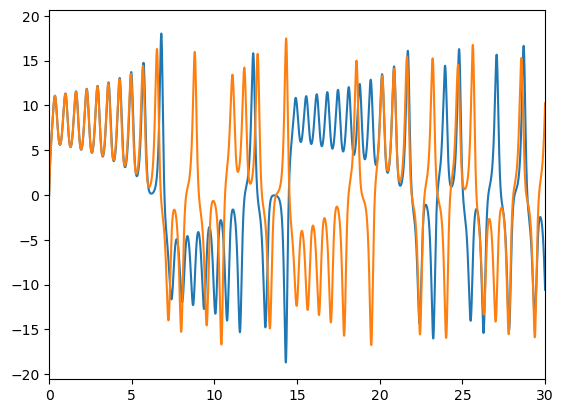

In [45]:
plt.plot(sindy_sim_time,sindy_model_data[:,0])
plt.plot(sim_time,sim_data[:,0])
plt.xlim(0,30)

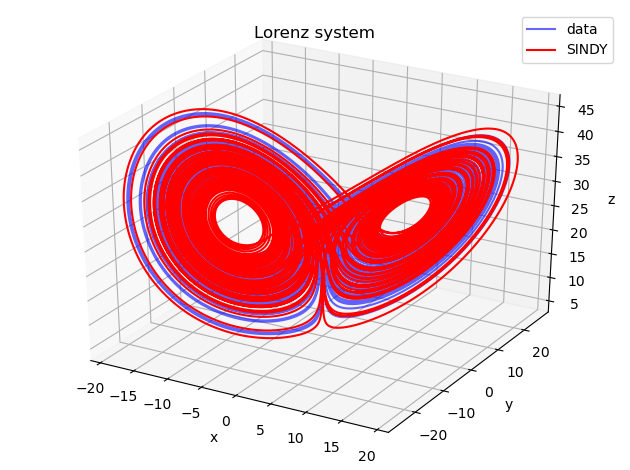

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(sim_data.T[0],sim_data.T[1],sim_data.T[2],color="blue",alpha=0.6,label="data")
ax.plot3D(sindy_model_data[:,0],sindy_model_data[:,1],sindy_model_data[:,2],color="red",label="SINDY")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Lorenz system")
ax.legend()
plt.tight_layout()

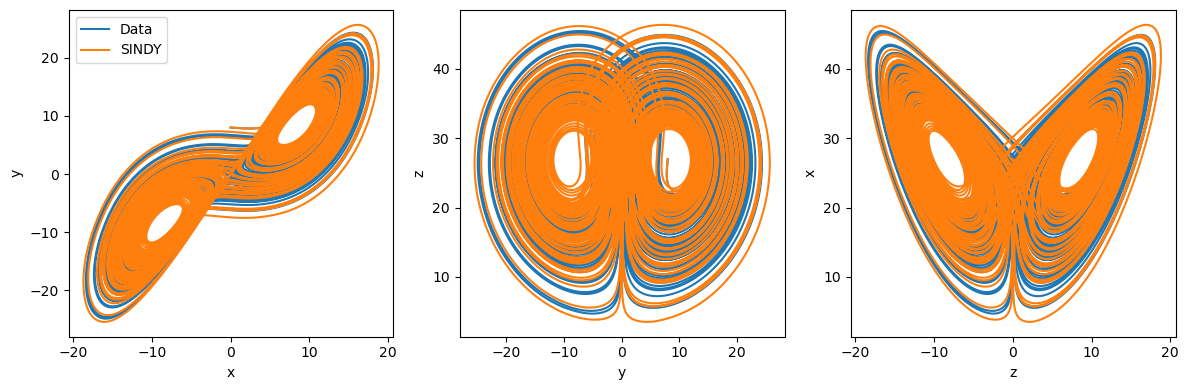

In [13]:
fig,ax = plt.subplots(1,3,figsize=[12,4])
ax[0].plot(sim_data[:,0],sim_data[:,1],label="Data")
ax[0].plot(sindy_model_data[:,0],sindy_model_data[:,1],label="SINDY")
ax[0].legend()
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[1].plot(sim_data[:,1],sim_data[:,2])
ax[1].plot(sindy_model_data[:,1],sindy_model_data[:,2])
ax[1].set_xlabel("y")
ax[1].set_ylabel("z")
ax[2].plot(sim_data[:,0],sim_data[:,2])
ax[2].plot(sindy_model_data[:,0],sindy_model_data[:,2])
ax[2].set_xlabel("z")
ax[2].set_ylabel("x")
fig.tight_layout()